In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data/survey_results_public.csv')
schema = pd.read_csv('./data/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# Creating a variable to look at only needed columns
new_df = df[['WorkStart', 'Salary', 'JobSatisfaction']]
new_df

,WorkStart,Salary,JobSatisfaction
0,6:00 AM,NaN,NaN
1,10:00 AM,NaN,NaN
2,9:00 AM,113750.0,9.0
3,9:00 AM,NaN,3.0
4,NaN,NaN,8.0
...,...,...,...
51387,9:00 AM,58000.0,3.0
51388,8:00 AM,NaN,NaN
51389,NaN,NaN,10.0
51390,2:00 PM,40000.0,7.0


In [167]:
# Drop all columns values which equal to NaN
new_df = new_df.dropna()

In [168]:
# Look at the WorkStart-variable
new_df['WorkStart'].value_counts()

9:00 AM     3177
10:00 AM    3049
8:00 AM     2497
7:00 AM     1207
11:00 AM     741
6:00 AM      395
Noon         299
1:00 PM      117
2:00 PM      111
5:00 AM       75
6:00 PM       58
8:00 PM       57
10:00 PM      47
3:00 PM       39
4:00 PM       36
9:00 PM       31
4:00 AM       29
5:00 PM       23
7:00 PM       23
11:00 PM      15
1:00 AM       12
3:00 AM        9
Midnight       8
2:00 AM        7
Name: WorkStart, dtype: int64

In [169]:
workstart_id_df = pd.DataFrame( 
    {
        "id": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
        "WorkStart": ["Midnight","01:00 AM","02:00 AM","03:00 AM","04:00 AM","05:00 AM","06:00 AM","07:00 AM","08:00 AM","09:00 AM","10:00 AM","11:00 AM","Noon","01:00 PM","02:00 PM","03:00 PM","04:00 PM","05:00 PM","06:00 PM","07:00 PM","08:00 PM","09:00 PM","10:00 PM","11:00 PM"]
    })
workstart_df = new_df
result = pd.merge(workstart_id_df, workstart_df, on="WorkStart")


In [170]:
result

,id,WorkStart,Salary,JobSatisfaction
0,0,Midnight,18352.664807,3.0
1,0,Midnight,37878.787879,10.0
2,0,Midnight,5285.567464,8.0
3,0,Midnight,26370.370370,5.0
4,0,Midnight,10277.492292,8.0
...,...,...,...,...
4154,23,11:00 PM,574.162679,6.0
4155,23,11:00 PM,18064.516129,6.0
4156,23,11:00 PM,6000.000000,5.0
4157,23,11:00 PM,4404.639554,10.0


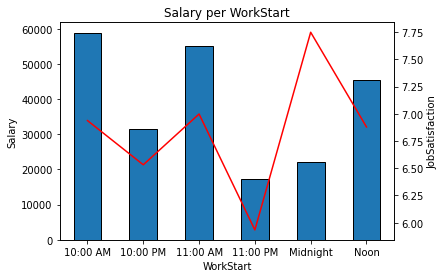

In [171]:
ax = result.groupby('WorkStart')['JobSatisfaction'].mean().plot(secondary_y=True, color="r", ylabel="Salary")
result.groupby('WorkStart')['Salary'].mean().plot.bar(ylabel="JobSatisfaction", ax=ax, edgecolor="black")

plt.title('Salary per WorkStart')
plt.show()

In [ ]:
# Apparently there are only 6 times where people start working, either its between 10 am and noon or 10 pm and midnight.
# As shown in the plot, people starting at 11pm do have the lowest JobSatisfaction and Salary in average
# The highest JobSatisfaction is at midnight even thou, the Salary is the second lowest